In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge

In [ ]:
# Importing the dataset
data = pd.read_csv('/content/demohouseprice1.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,lat,long
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,7,1180,0,1955,0,98178,1340,5650,47.5112,-122.257
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,7,2170,400,1951,1991,98125,1690,7639,47.7210,-122.319
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,6,770,0,1933,0,98028,2720,8062,47.7379,-122.233
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,7,1050,910,1965,0,98136,1360,5000,47.5208,-122.393
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,8,1680,0,1987,0,98074,1800,7503,47.6168,-122.045


In [ ]:
#droping the unnecessary columns such as id, date, zipcode , lat and long
data.drop(['id','date'],axis=1,inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,lat,long
0,221900,3,1.00,1180,5650,1.0,7,1180,0,1955,0,98178,1340,5650,47.5112,-122.257
1,538000,3,2.25,2570,7242,2.0,7,2170,400,1951,1991,98125,1690,7639,47.7210,-122.319
2,180000,2,1.00,770,10000,1.0,6,770,0,1933,0,98028,2720,8062,47.7379,-122.233
3,604000,4,3.00,1960,5000,1.0,7,1050,910,1965,0,98136,1360,5000,47.5208,-122.393
4,510000,3,2.00,1680,8080,1.0,8,1680,0,1987,0,98074,1800,7503,47.6168,-122.045


In [ ]:
# checking for null values/missing values
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
lat              0
long             0
dtype: int64

In [ ]:
data.nunique()

price            352
bedrooms           6
bathrooms         16
sqft_living      247
sqft_lot         440
floors             5
grade              9
sqft_above       220
sqft_basement    104
yr_built         104
yr_renovated      18
zipcode           69
sqft_living15    211
sqft_lot15       424
lat              465
long             283
dtype: int64

# Data Preprocessing


In [ ]:
# changing float to integer
data['bathrooms'] = data['bathrooms'].astype(int)
data['floors'] = data['floors'].astype(int)
# renaming the column yr_built to age and changing the values to age
data.rename(columns={'yr_built':'age'},inplace=True)
data['age'] = 2023 - data['age']
# changing the column yr_renovated to renovated and changing the values to 0 and 1
data.rename(columns={'yr_renovated':'renovated'},inplace=True)
data['renovated'] = data['renovated'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
# using simple feature scaling
data['sqft_living'] = data['sqft_living']/data['sqft_living'].max()
data['sqft_living15'] = data['sqft_living15']/data['sqft_living15'].max()
data['sqft_lot'] = data['sqft_lot']/data['sqft_lot'].max()
data['sqft_above'] = data['sqft_above']/data['sqft_above'].max()
data['sqft_basement'] = data['sqft_basement']/data['sqft_basement'].max()
data['sqft_lot15'] = data['sqft_lot15']/data['sqft_lot15'].max()

In [ ]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,age,renovated,zipcode,sqft_living15,sqft_lot15,lat,long
0,221900,3,1,0.194399,0.017915,1,7,0.194399,0.000000,68,0,98178,0.281513,0.026743,47.5112,-122.257
1,538000,3,2,0.423394,0.022963,2,7,0.357496,0.194175,72,1,98125,0.355042,0.036158,47.7210,-122.319
2,180000,2,1,0.126853,0.031708,1,6,0.126853,0.000000,90,0,98028,0.571429,0.038160,47.7379,-122.233
3,604000,4,3,0.322900,0.015854,1,7,0.172982,0.441748,58,0,98136,0.285714,0.023667,47.5208,-122.393
4,510000,3,2,0.276771,0.025620,1,8,0.276771,0.000000,36,0,98074,0.378151,0.035514,47.6168,-122.045


In [ ]:
# adding a new column price_range and categorizing the price into 4 categories
data['price_range'] = pd.cut(data['price'],bins=[0,321950,450000,645000,1295648],labels=['Low','Medium','High','Very High'])

In [ ]:
map = folium.Map(location=[47.5480, -121.9836],zoom_start=8)
marker_cluster = FastMarkerCluster(data[['lat', 'long']].values.tolist()).add_to(map)
map

# Train/Test Split

In [ ]:
data.drop(['price_range'],axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data.drop('price',axis=1),data['price'],test_size=0.3,random_state=10)


# Model Training

Using pipeline to combine the transformers and estimators and fit the model

Ridge Regression


In [ ]:
Ridgemodel = Ridge(alpha = 0.001)
Ridgemodel

Ridge(alpha=0.001)

In [ ]:
# training the model
Ridgemodel.fit(X_train,y_train)
Ridgemodel.score(X_test,y_test)

0.5911245077386017

In [ ]:
#testing the model
r_pred = Ridgemodel.predict(X_test)
r2_score(y_test,r_pred)

0.5911245077386017

Random Forest Regression


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor

RandomForestRegressor(random_state=0)

In [ ]:
# training the model
regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)

0.6819040469568072

In [ ]:
#testing the model
yhat = regressor.predict(X_test)
r2_score(y_test,yhat)

0.6819040469568072

# Model Evalution


Distribution plot from the models predictions and the actual values


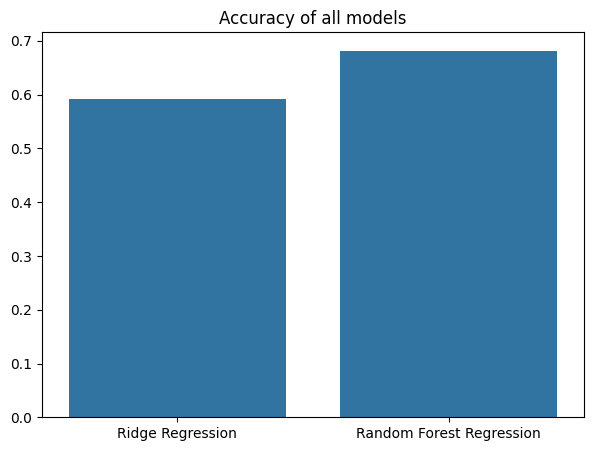

In [ ]:
# plot accuracy of all models in the same graph
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=['Ridge Regression','Random Forest Regression'],y=[metrics.r2_score(y_test,r_pred),metrics.r2_score(y_test,yhat)])
ax.set_title('Accuracy of all models')
plt.show()

Predicting the price of a new house


In [ ]:
#input the values
bedrooms = 5
bathrooms = 4
sqft_living = 5000
sqft_lot = 5000
floors = 1
grade = 10
sqft_above = 3000
sqft_basement = 0
yr_built = 2020
yr_renovated = 0
zipcode = 98001
lat = 47.5480
long = -121.9836
sqft_living15 = 2000
sqft_lot15 = 10000

In [ ]:
#predicting the price using random forest regression
price = regressor.predict([[bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15]])
print('The price of the house is $',price[0])

The price of the house is $ 1514789.9


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


$ 1493163.8